# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

## Elizabeth Hunter (mwm6nq) and Eva Massarelli (ecm8yu)

In [31]:
! git clone https://www.github.com/DS3001/the_bootstrap

fatal: destination path 'the_bootstrap' already exists and is not an empty directory.


**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
import os
print(os.getcwd())

/content


In [3]:
df = pd.read_csv('./the_bootstrap/data/mammogram.csv')
# Import data into environment
print(df.head())
gdf = df.copy()
print(df.describe()) #no missing values

   treatment breast_cancer_death
0  mammogram                 yes
1  mammogram                 yes
2  mammogram                 yes
3  mammogram                 yes
4  mammogram                 yes
        treatment breast_cancer_death
count       89835               89835
unique          2                   2
top     mammogram                  no
freq        44925               88830


1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?

In [4]:
gdf['breast_cancer_death'] =gdf['breast_cancer_death'].replace('no', 0) #change var to binary
gdf['breast_cancer_death'] =gdf['breast_cancer_death'].replace('yes', 1) #changing to binary
gdf['breast_cancer_death'] = gdf['breast_cancer_death'].astype(int) #make an int

In [5]:
pd.crosstab(gdf['treatment'],gdf['breast_cancer_death'])

breast_cancer_death,0,1
treatment,,
control,44405,505
mammogram,44425,500


In [6]:
# Survival rate for control group
c_sr = (44405/(505+44405))*100
print('Control Survival Rate: ',c_sr,'%')

# Survival rate for treatment group
t_sr = (44425/(500+44425))*100
print('Treatment Survival Rate: ',t_sr,'%')

# Difference in control and treatment survival rates
sr_diff = t_sr - c_sr
print('Difference Between Control and Treament Group Survival Rates: ',sr_diff,'%')

Control Survival Rate:  98.87552883544868 %
Treatment Survival Rate:  98.88703394546467 %
Difference Between Control and Treament Group Survival Rates:  0.011505110015988862 %


In [38]:
#the differnce between the mammogram and control is that 0.988925 (control, no death) 0.988860 (mammogram, no death)
#and 0.011241 (control and death) and 0.011128 (mammogram and death)
#getting a mamogram, you have very slightly better chance of not dying

2. Bootstrap the densities and distributions of survival rates for the two groups.

In [8]:
df['no'] = 0
df.loc[df['breast_cancer_death']=='no','no']=1

pd.crosstab(df['treatment'],df['breast_cancer_death'])

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


-0.00011505110015985753


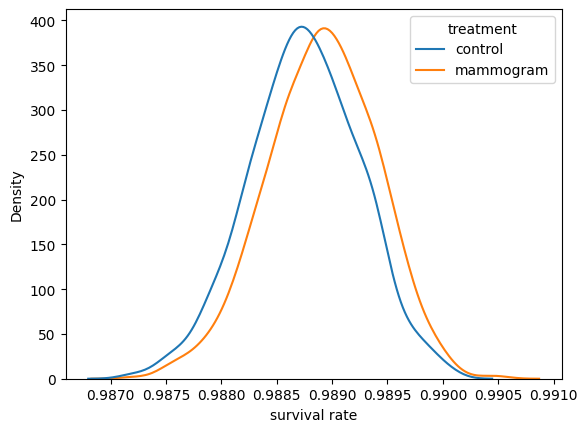

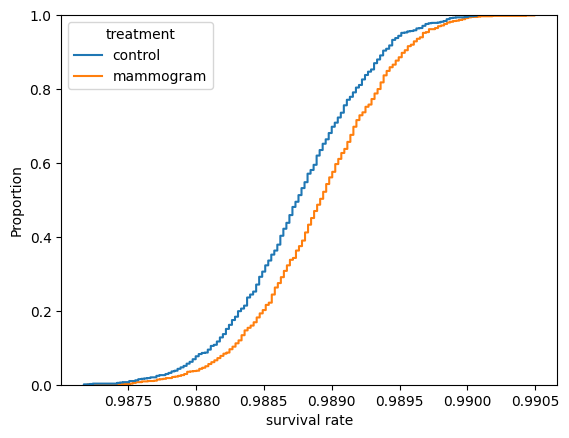

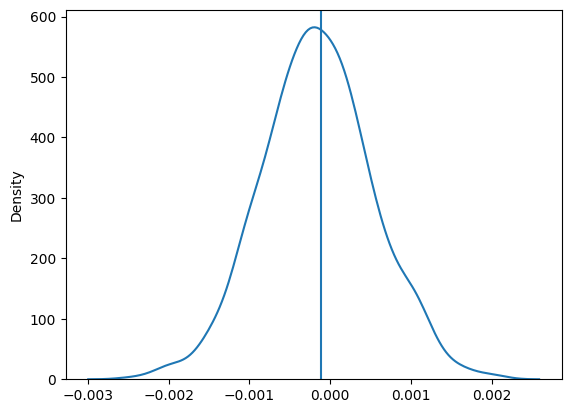

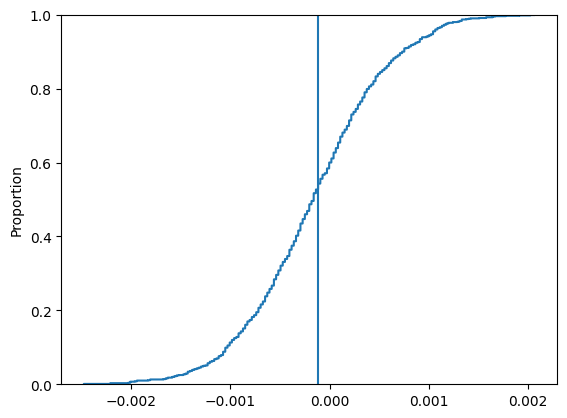

In [9]:
#2
# Full sample survival averages and difference:
control_0 = df.loc[ df['treatment'] =='control', 'no'].mean()
mammogram_0 = df.loc[ df['treatment'] =='mammogram', 'no' ].mean()
diff_0 =  control_0 - mammogram_0
print(diff_0)

# Control data:
df_c = df.loc[ df['treatment'] == 'control', 'no']
N_c = df_c.shape[0]
# Treatment data:
df_m = df.loc[ df['treatment'] =='mammogram', 'no' ]
N_m = df_m.shape[0]

# Simulation:
S = 1000
rate_C = np.zeros(S) # control death rates
rate_M = np.zeros(S) # mammogram death rate
diff = np.zeros(S)  # Difference in death rates

# Bootstrapping:
for s in range(S):
    sample_C = df_c.sample(N_c,axis=0,replace=True) # Resample control
    rate_C[s] = sample_C.mean() # Mean promotion rate, control
    sample_M = df_m.sample(N_m,axis=0,replace=True) # Resample mammogram
    rate_M[s] = sample_M.mean() # Mean promotion rate, mammogram
    diff[s] = rate_C[s]-rate_M[s] # Difference in rates

# Combine control and mammogram into one dataframe for plotting:
rdf_C = pd.DataFrame({'treatment':'control','survival rate':rate_C})
rdf_M = pd.DataFrame({'treatment':'mammogram','survival rate':rate_M})
rdf = pd.concat([rdf_C,rdf_M],axis=0)

# Density plot of survival rates:
sns.kdeplot(data=rdf,x='survival rate',hue='treatment')
plt.show()

# ECDF of survival rates:
sns.ecdfplot(data=rdf,x='survival rate',hue='treatment')
plt.show()

# Density plot of differences in rates:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0)
plt.show()

# ECDF of differences in rates:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0)
plt.show()

3. Construct a 99% confidence interval for the difference in outcomes between the two groups. Does it include zero?

Point Estimate:  -0.00011505110015985753
CI: [-0.00200746  0.00164387]


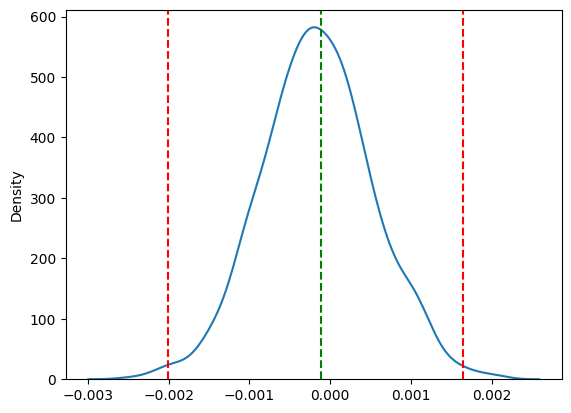

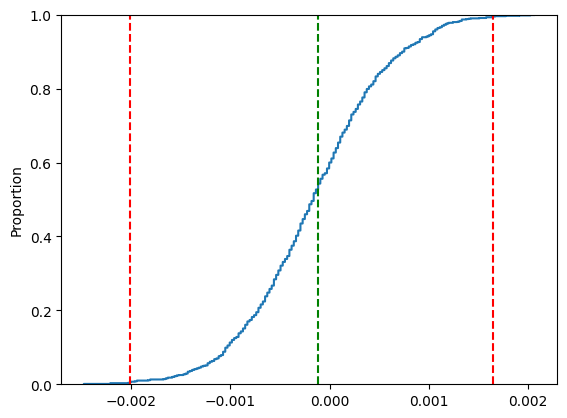

In [10]:
CI = np.quantile(diff,[.005,.995]) # Compute 99% CI
print('Point Estimate: ', diff_0)
print( 'CI: ' + str(CI) )

# Density plot of differences in rates, CI:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

# ECDF of differences in rates, CI:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

Our hypothesis was that the survival rates of the control and treatment groups would be statistically different at the 99% level. The 99% CI includes 0, meaning we can reject the hypothesis because having a difference of 0 is likely.

4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

These data may overstate the conclusion that a person getting a mammograms does not see a siginificant difference in breast cancer survival rates than someone who doesn't receive one because we did not have any other parameters of the patient data like cancer stage, patient age, or gender. The additional data is important to consider previous conditions, progression of cancer, and likelihood of getting a mammogram in the first place.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

In [27]:
ddf = pd.read_csv('./the_bootstrap/data/diabetes_hw.csv')
print(ddf.head())
print(ddf.describe())

   Unnamed: 0  treatment  outcome
0           1        met  success
1           2       rosi  failure
2           3       rosi  success
3           4  lifestyle  success
4           5        met  success
       Unnamed: 0
count  699.000000
mean   350.000000
std    201.928205
min      1.000000
25%    175.500000
50%    350.000000
75%    524.500000
max    699.000000


1. Cross tabulate `treatment` and `outcome`.

In [32]:
ddf['success'] = 0
ddf.loc[ddf['outcome']=='success','success']=1

pd.crosstab(ddf['treatment'],ddf['outcome'])

outcome,failure,success
treatment,,
lifestyle,109,125
met,120,112
rosi,90,143


2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?

In [29]:
# Proportion of success lifestyle treatment
l_sr = 125/(125+109)
print('Proportion of success lifestyle treatment: ',l_sr)

# Proportion of success met treatment
met_sr = 112/(112+120)
print('Proportion of success met treatment: ',met_sr)

# Proportion of success rosi treatment
r_sr = 143/(143+90)
print('Proportion of success rosi treatment: ',r_sr)

Proportion of success lifestyle treatment:  0.5341880341880342
Proportion of success met treatment:  0.4827586206896552
Proportion of success rosi treatment:  0.6137339055793991


The most successful treatment appears to rosi, which makes up 61% of the successes.

3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?

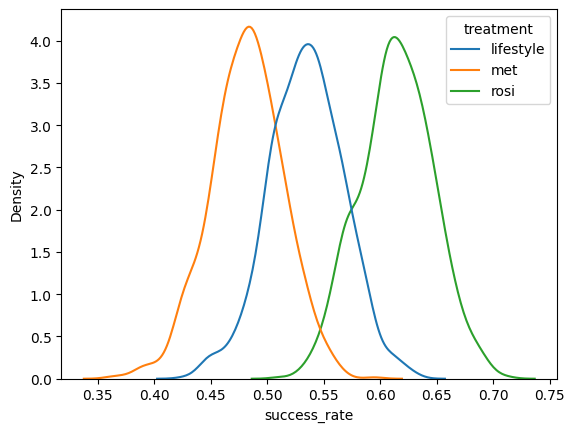

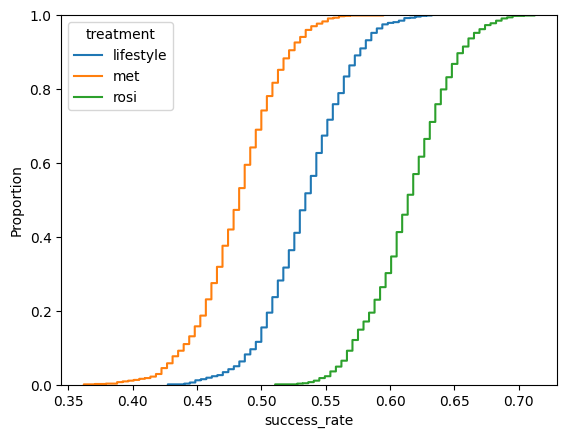

In [42]:
# Full sample promotion averages:
lifestyle_0 = ddf.loc[ ddf['treatment'] =='lifestyle', 'success' ].mean()
met_0 = ddf.loc[ ddf['treatment'] =='met', 'success' ].mean()
rosi_0 = ddf.loc[ ddf['treatment'] =='rosi', 'success' ].mean()

# Lifestyle data:
ddf_ld = ddf.loc[ ddf['treatment'] =='lifestyle', 'success' ]
N_ld = ddf_ld.shape[0]
# Met data:
ddf_md = ddf.loc[ ddf['treatment'] =='met', 'success' ]
N_md = ddf_md.shape[0]
# Rosi data:
ddf_rd = ddf.loc[ ddf['treatment'] =='rosi', 'success' ]
N_rd = ddf_rd.shape[0]

# Simulation:
S = 1000
rate_Lds = np.zeros(S) # Lifestyle success rate
rate_Mds = np.zeros(S) # Met success rate
rate_Rds = np.zeros(S) # Rosi success rate

# Bootstrapping:
for s in range(S):
    sample_Ld = ddf_ld.sample(N_ld,axis=0,replace=True) # Resample lifestyle
    rate_Lds[s] = sample_Ld.mean() # Mean success rate, lifestyle
    sample_Md = ddf_md.sample(N_md,axis=0,replace=True) # Resample met
    rate_Mds[s] = sample_Md.mean() # Mean success rate, met
    sample_Rd = ddf_rd.sample(N_rd,axis=0,replace=True) # Resample rosi
    rate_Rds[s] = sample_Rd.mean() # Mean success rate, rosi

# Combine male and female result into one dataframe for plotting:
rddf_L = pd.DataFrame({'treatment':'lifestyle','success_rate':rate_Lds})
rddf_M = pd.DataFrame({'treatment':'met','success_rate':rate_Mds})
rddf_R = pd.DataFrame({'treatment':'rosi','success_rate':rate_Rds})
rddf = pd.concat([rddf_L,rddf_M,rddf_R],axis=0)

# Density plot of promotion rates:
sns.kdeplot(data=rddf,x='success_rate',hue='treatment')
plt.show()

# ECDF of promotion rates:
sns.ecdfplot(data=rddf,x='success_rate',hue='treatment')
plt.show()

The rosi treatment appears to be the most effective as the density curve shows the peak appearing at a higher success rate than the other treatment options. Additionally, the empirical CDF curves show that the cummulative density of outcomes happens at a higher success_rate for rosi than the other treatments.

4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?

In [43]:
# Full sample differences:
diff_l_m_0 = lifestyle_0 - met_0
diff_m_r_0 = met_0 - rosi_0
diff_r_l_0 = rosi_0 - lifestyle_0

# Simulation
S = 1000
rate_Lds2 = np.zeros(S) # Lifestyle success rate
rate_Mds2 = np.zeros(S) # Met success rate
rate_Rds2 = np.zeros(S) # Rosi success rate
diff_l_m = np.zeros(S) # Difference in lifestyle and met success
diff_m_r = np.zeros(S) # Difference in met and rosi success
diff_r_l = np.zeros(S) # Difference in rosi and lifestyle success

# Bootstrapping:
for s in range(S):
    sample_Ld2 = ddf_ld.sample(N_ld,axis=0,replace=True) # Resample lifestyle
    rate_Lds2[s] = sample_Ld2.mean() # Mean success rate, lifestyle
    sample_Md2 = ddf_md.sample(N_md,axis=0,replace=True) # Resample met
    rate_Mds2[s] = sample_Md2.mean() # Mean success rate, met
    sample_Rd2 = ddf_rd.sample(N_rd,axis=0,replace=True) # Resample rosi
    rate_Rds2[s] = sample_Rd2.mean() # Mean success rate, rosi
    diff_l_m[s] = rate_Lds2[s]-rate_Mds2[s] # Difference in lifestyle and met success rates
    diff_m_r[s] = rate_Mds2[s]-rate_Rds2[s] # Difference in met and rosi success rates
    diff_r_l[s] = rate_Rds2[s]=rate_Lds2[s] # Difference in rosi and lifestyle success rates

Point Estimate:  0.051429413498378984
CI: [-0.02578839  0.12850169]


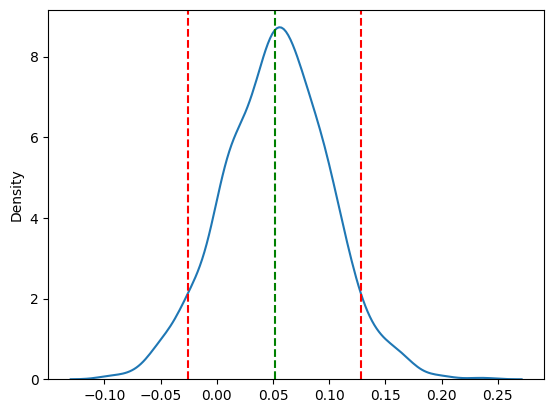

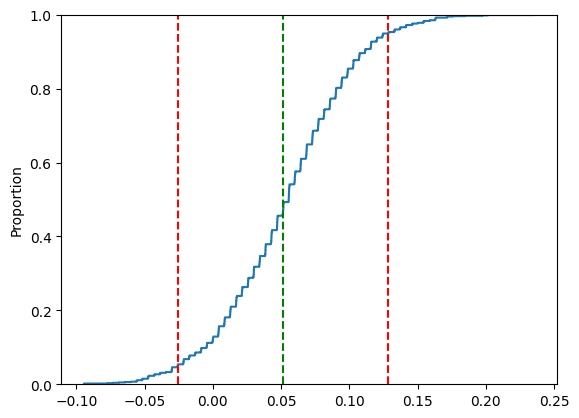

In [46]:
CI = np.quantile(diff_l_m,[.05,.95]) # Compute 90% CI
print('Point Estimate: ', diff_l_m_0)
print( 'CI: ' + str(CI) )

# Density plot of differences in lifestyle and met success rates, CI:
ax = sns.kdeplot(diff_l_m)
ax.axvline(x = diff_l_m_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

# ECDF of differences in rates, CI:
ax = sns.ecdfplot(diff_l_m)
ax.axvline(x = diff_l_m_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

Point Estimate:  -0.13097528488974391
CI: [-0.20412258 -0.05342608]


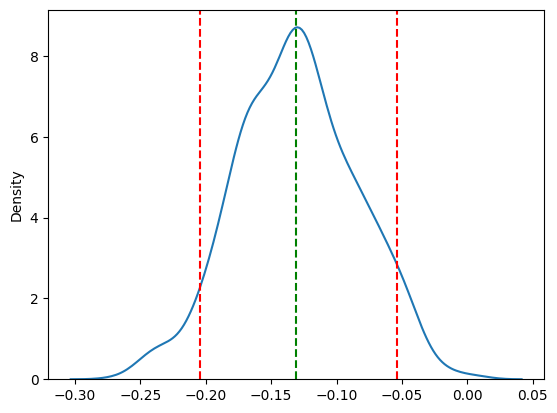

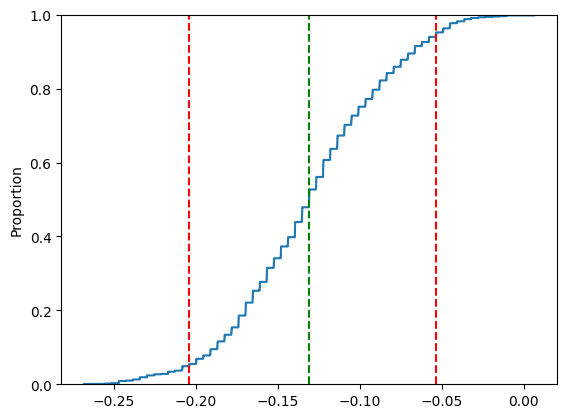

In [47]:
CI = np.quantile(diff_m_r,[.05,.95]) # Compute 90% CI
print('Point Estimate: ', diff_m_r_0)
print( 'CI: ' + str(CI) )

# Density plot of differences in met and rosi success rates, CI:
ax = sns.kdeplot(diff_m_r)
ax.axvline(x = diff_m_r_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

# ECDF of differences in rates, CI:
ax = sns.ecdfplot(diff_m_r)
ax.axvline(x = diff_m_r_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

Point Estimate:  0.07954587139136493
CI: [0.48290598 0.58974359]


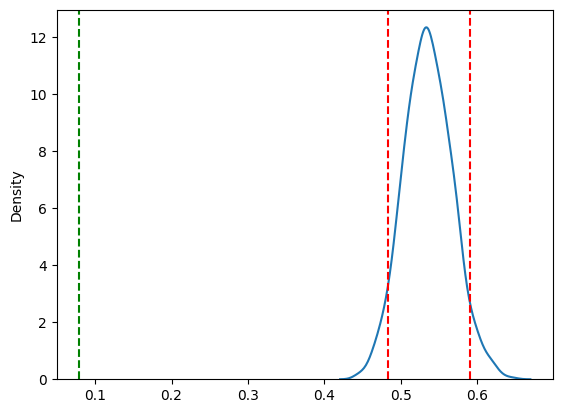

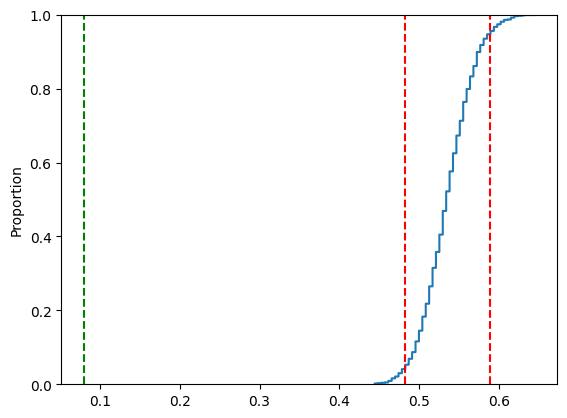

In [48]:
CI = np.quantile(diff_r_l,[.05,.95]) # Compute 90% CI
print('Point Estimate: ', diff_r_l_0)
print( 'CI: ' + str(CI) )

# Density plot of differences in rosi and lifestyle success rates, CI:
ax = sns.kdeplot(diff_r_l)
ax.axvline(x = diff_r_l_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

# ECDF of differences in rates, CI:
ax = sns.ecdfplot(diff_r_l)
ax.axvline(x = diff_r_l_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

5. Which treatment appears to be the most effective overall?

The most affective treatment seems to be rosi. The point estimate of the lifestyle v. met treatments is 0.05, meaning lifestyle has a slightly higher success rate than the met treatment. And the point estimate for rosi v. lifestyle was 0.08, meaning rosi had a higher sucess than lifestyle. This means the order of success is met < lifestyle < rosi. Additionally, the rosi v. lifestyle CI is the only one that does not contain 0, meaning the hypothesis that the two treatments are statistically significantly different cannot be rejected.

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant$\times$age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Add the intercept and the transplanttreatment coefficients together from part 3. What do you get? Does that make sense? What are you missing in predicting survival probability this way?
5. Plot the predicted survival probability by age for people who receive a heart transplant and those who don't. Describe what you see.
6. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).

2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.

**Q5.** This question refers to `mn_police_use_of_force.csv`. This includes reports on the Minnesota police department's use of force from 1/1/2016 to 8/31/2021. This is, perhaps, a potentially controversial set of data to look at, but I imagine many students sincerely want to think about the difficult questions that society grapples with, what kind of evidence exists, and how they might analyze it using tools from class. We should also always be skeptical of data, particularly when the source has an interest in controlling our beliefs and can define or omit data to advance its interests.

The data include:
- `response_datetime`: DateTime of police response.
- `problem`: Problem that required police response.
- `is_911_call`: Whether response was iniated by call to 911.
- `primary_offense`: Offense of subject.
- `subject_injury`: Whether subject was injured Yes/No/null.
- `force_type`: Type of police force used.
- `force_type_action`: Detail of police force used.
- `race`: Race of subject.
- `sex`: Gender of subject.
- `age`: Age of subject.
- `type_resistance`: Resistance to police by subject.
- `precinct`: Precinct where response occurred.
- `neighborhood`: Neighborhood where response occurred.

To answer the following questions, you need to make choices about what to focus on and how to conduct the analysis. Explain your choices and defend them where appropriate.

1. Are there significant missing values? In what variables? In particular, consider `subject_injury`. Clearly discuss what you find.
2. Cross tabulate `race` and `force_type`. What patterns do you notice? Use the options `normalize='columns'` and `normalize='rows'`, and `margins=True` to explore different ways of normalizing the data to better understand results by race.
3. Use tables, crosstabulation and the bootstrap to investigate the extent to which `force_type` varies between different races.
4. Use tables, crosstabulation and the bootstrap to investigate the extent to which `Maximal Restraint Technique` varies between different races.
5. Use tables, crosstabulation and the bootstrap to investigate the extent to which `subject_injury` varies between different races. Please be clear about how you address the large number of NaN's (you might even use the other data to look at what predicts a NaN in this column to see if there are systematic patterns).
6. Summarize your findings.